In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
pd.set_option('max_columns', None)

In [3]:
DATA_PATH = "../../Data/STRUCTURED_DATA/DATA_CEA/all_cea_data.csv"

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
df.head(10)

id_pat        date    activity  timeline  Avant_pied_droit_appui  \
0    P01  2019-05-07  2minBassin  0.000000                     1.0   
1    P01  2019-05-07  2minBassin  0.025575                     1.0   
2    P01  2019-05-07  2minBassin  0.051151                     1.0   
3    P01  2019-05-07  2minBassin  0.076726                     1.0   
4    P01  2019-05-07  2minBassin  0.102302                     1.0   
5    P01  2019-05-07  2minBassin  0.127877                     1.0   
6    P01  2019-05-07  2minBassin  0.153453                     1.0   
7    P01  2019-05-07  2minBassin  0.179028                     1.0   
8    P01  2019-05-07  2minBassin  0.204604                     1.0   
9    P01  2019-05-07  2minBassin  0.230179                     1.0   

   Medio_pied_droit_appui  Arriere_pied_droit_appui  Avant_pied_gauche_appui  \
0                     0.0                       0.0                      0.0   
1                     0.0                       0.0                      0.0   
2                     0.0                       0.0                      0.0   
3                     0.0                       0.0                      0.0   
4                     0.0                       0.0                      0.0   
5                     0.0                       0.0                      0.0   
6                     0.0                       0.0                      0.0   
7                     0.0                       0.0                      0.0   
8                     0.0                       0.0                      0.0   
9                     0.0                       0.0                      0.0   

   Medio_pied_gauche_appui  Arriere_pied_gauche_appui  Semelle_Droite_Capt_1  \
0                      1.0                        0.0                   49.0   
1                      1.0                        0.0                   49.0   
2                      1.0                        0.0                   50.0   
3                      1.0                        0.0                   49.0   
4                      1.0                        0.0                   50.0   
5                      1.0                        0.0                   50.0   
6                      1.0                        0.0                   50.0   
7                      1.0                        0.0                   49.0   
8                      1.0                        0.0                   49.0   
9                      1.0                        0.0                   49.0   

   Semelle_Droite_Capt_2  Semelle_Droite_Capt_3  Semelle_Droite_Capt_4  \
0                   19.0                   18.0                   34.0   
1                   19.0                   18.0                   34.0   
2                   19.0                   18.0                   34.0   
3                   19.0                   18.0                   33.0   
4                   19.0                   18.0                   34.0   
5                   19.0                   18.0                   34.0   
6                   19.0                   18.0                   34.0   
7                   19.0                   18.0                   34.0   
8                   19.0                   18.0                   34.0   
9                   19.0                   18.0                   34.0   

   Semelle_Droite_Capt_5  Semelle_Droite_Capt_6  Semelle_Droite_Capt_7  \
0                   30.0                   34.0                   40.0   
1                   30.0                   34.0                   40.0   
2                   30.0                   34.0                   40.0   
3                   30.0                   34.0                   40.0   
4                   30.0                   34.0                   40.0   
5                   30.0                   34.0                   40.0   
6                   30.0                   33.0                   40.0   
7                   30.0                   34.0               

In [19]:
tst = df[(df.id_pat=='P01') & (df.activity=='6min')][['CI_Droit_qui_se_leve', 'CI_Droit_qui_se_pose']]

<AxesSubplot:>

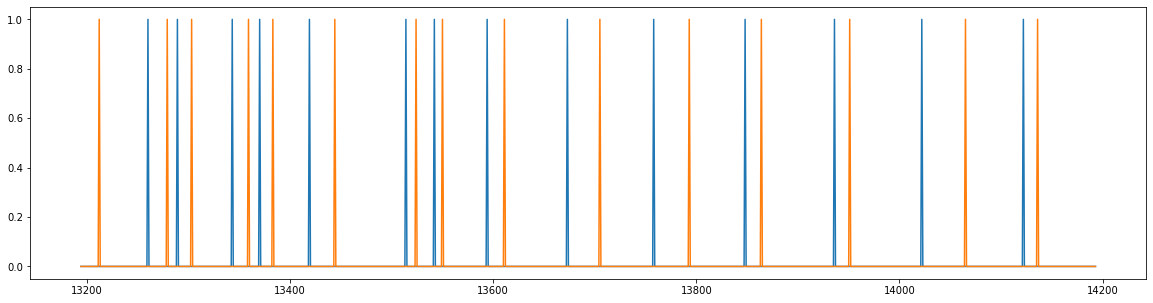

In [25]:
tst.CI_Droit_qui_se_leve[7000:8000].plot(figsize=(20,5))
tst.CI_Droit_qui_se_pose[7000:8000].plot(figsize=(20,5))

In [27]:
transform_tst = (tst.CI_Droit_qui_se_leve-tst.CI_Droit_qui_se_pose)[7000:8000]#.plot(figsize=(20,10))

<AxesSubplot:>

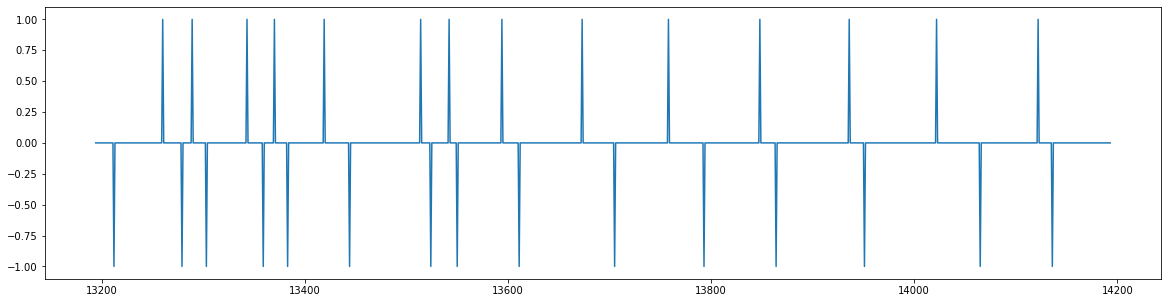

In [72]:
transform_tst.plot(figsize=(20,5))

<AxesSubplot:>

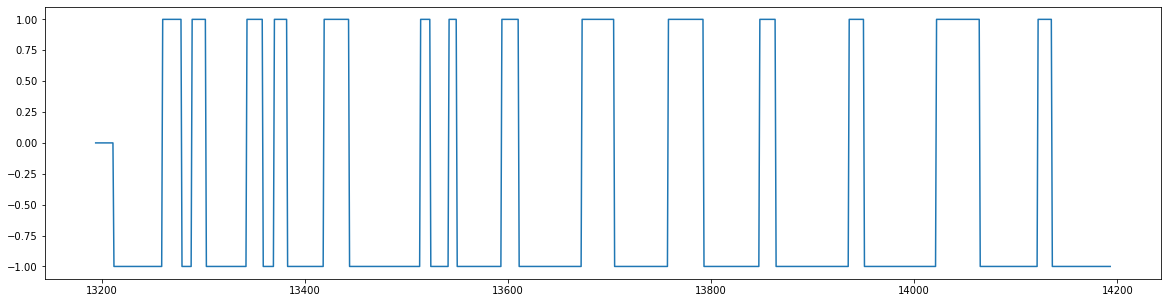

In [73]:
(transform_tst.replace(0, np.nan).ffill().fillna(0)).plot(figsize=(20,5))

In [45]:
iter_df = df[['id_pat', 'activity']].groupby(['id_pat', 'activity']).count().reset_index()

In [74]:
transform_df = pd.DataFrame()
for idx, row in iter_df.iterrows():
    temp_df = df.loc[(df.id_pat==row['id_pat']) & (df.activity==row['activity'])]
    
    temp_df['appui_leve_droit'] = temp_df.CI_Droit_qui_se_leve-temp_df.CI_Droit_qui_se_pose
    temp_df['appui_leve_gauche'] = temp_df.CI_Gauche_qui_se_leve-temp_df.CI_Gauche_qui_se_pose
    
    temp_df.appui_leve_droit = temp_df.appui_leve_droit.replace(0, np.nan).ffill().fillna(0)
    temp_df.appui_leve_gauche = temp_df.appui_leve_gauche.replace(0, np.nan).ffill().fillna(0)
    
    transform_df = pd.concat([transform_df, temp_df], axis=0)

<ipython-input-74-4ea43b82af43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['appui_leve_droit'] = temp_df.CI_Droit_qui_se_leve-temp_df.CI_Droit_qui_se_pose
<ipython-input-74-4ea43b82af43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['appui_leve_gauche'] = temp_df.CI_Gauche_qui_se_leve-temp_df.CI_Gauche_qui_se_pose
C:\Users\youne\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [50]:
transform_df

id_pat        date    activity   timeline  Avant_pied_droit_appui  \
0          P01  2019-05-07  2minBassin   0.000000                     1.0   
1          P01  2019-05-07  2minBassin   0.025575                     1.0   
2          P01  2019-05-07  2minBassin   0.051151                     1.0   
3          P01  2019-05-07  2minBassin   0.076726                     1.0   
4          P01  2019-05-07  2minBassin   0.102302                     1.0   
...        ...         ...         ...        ...                     ...   
1232288    P42  2020-07-13        Step  27.022901                     0.0   
1232289    P42  2020-07-13        Step  27.048346                     0.0   
1232290    P42  2020-07-13        Step  27.073791                     0.0   
1232291    P42  2020-07-13        Step  27.099237                     0.0   
1232292    P42  2020-07-13        Step  27.124682                     0.0   

         Medio_pied_droit_appui  Arriere_pied_droit_appui  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
1232288                     0.0                       1.0   
1232289                     0.0                       1.0   
1232290                     0.0                       1.0   
1232291                     0.0                       1.0   
1232292                     0.0                       0.0   

         Avant_pied_gauche_appui  Medio_pied_gauche_appui  \
0                            0.0                      1.0   
1                            0.0                      1.0   
2                            0.0                      1.0   
3                            0.0                      1.0   
4                            0.0                      1.0   
...                          ...                      ...   
1232288                      0.0                      1.0   
1232289                      0.0                      1.0   
1232290                      0.0                      1.0   
1232291                      0.0                      1.0   
1232292                      0.0                      0.0   

         Arriere_pied_gauche_appui  Semelle_Droite_Capt_1  \
0                              0.0                   49.0   
1                              0.0                   49.0   
2                              0.0                   50.0   
3                              0.0                   49.0   
4                              0.0                   50.0   
...                            ...                    ...   
1232288                        1.0                   45.0   
1232289                        1.0                   46.0   
1232290                        1.0                   46.0   
1232291                        1.0                   47.0   
1232292                        0.0                   38.0   

         Semelle_Droite_Capt_2  Semelle_Droite_Capt_3  Semelle_Droite_Capt_4  \
0                         19.0                   18.0                   34.0   
1                         19.0                   18.0                   34.0   
2                         19.0                   18.0                   34.0   
3                         19.0                   18.0                   33.0   
4                         19.0                   18.0                   34.0   
...                        ...                    ...                    ...   
1232288                   26.0                    2.0                   13.0   
1232289                   26.0                    2.0                   13.0   
1232290                   26.0                    2.0                   13.0   
1232291                   26.0                    2.0                   13.0   
1232

<AxesSubplot:>

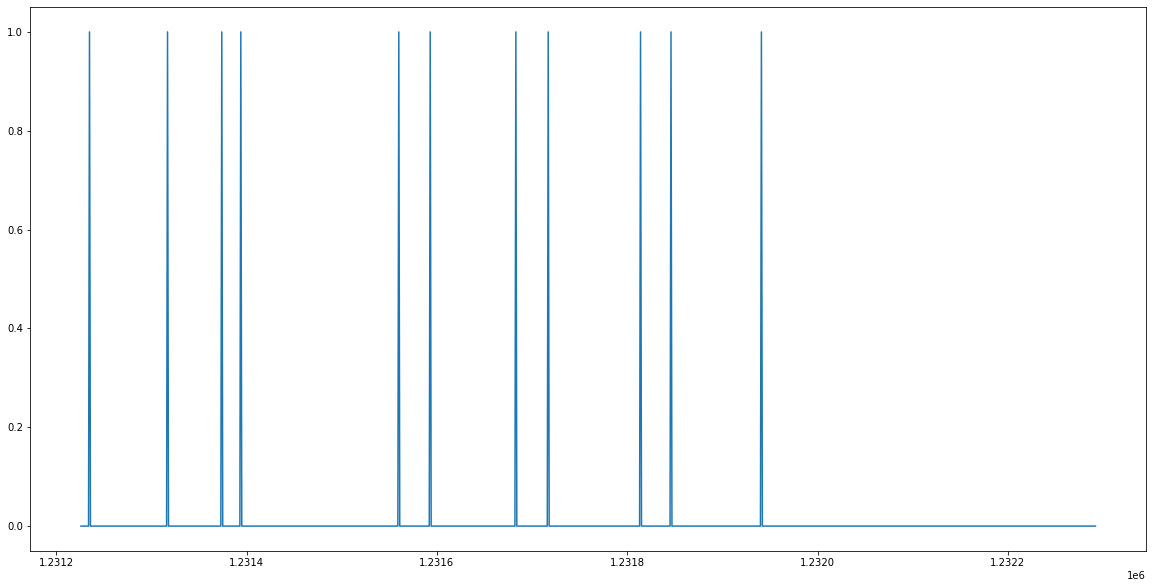

In [75]:
transform_df[(transform_df.id_pat=='P42') & (transform_df.activity=='Step')].CI_Gauche_qui_se_leve.plot(figsize=(20,10))
#transform_df[(transform_df.id_pat=='P42') & (transform_df.activity=='Step')].CI_Gauche_qui_se_pose.plot(figsize=(20,10))

<AxesSubplot:>

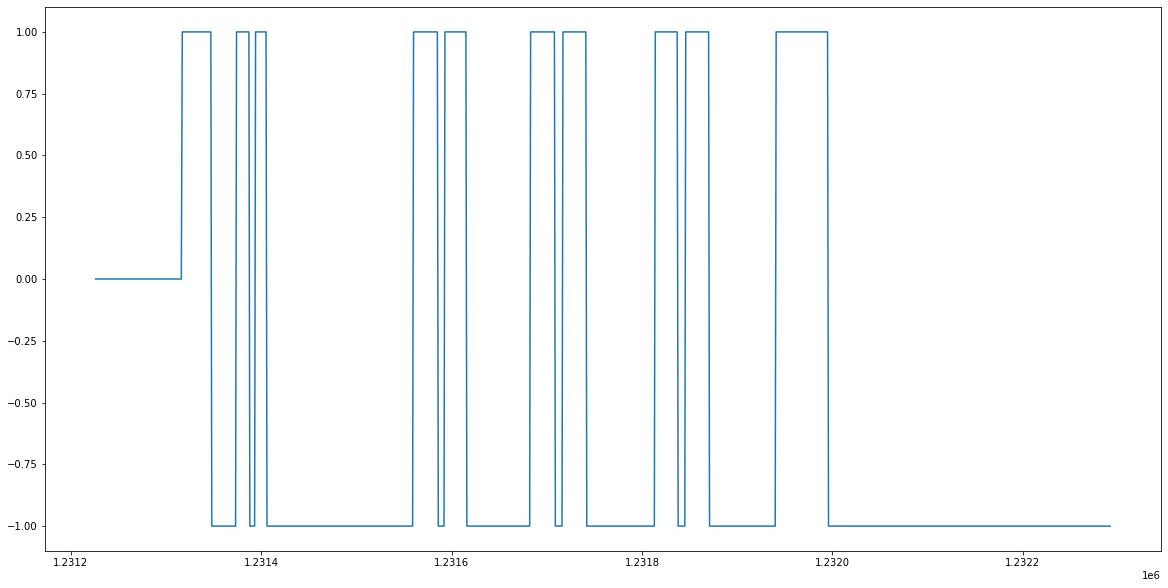

In [71]:
transform_df[(transform_df.id_pat=='P42') & (transform_df.activity=='Step')].appui_leve_gauche.plot(figsize=(20,10))